In [1]:
import pandas as pd
#pd.options.display.max_rows = 20000
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import gensim 
import nltk
import re , string #emoji, Stemmer, functools, operator
#import re , emoji, Stemmer, functools, operator, string
nltk.download('stopwords')
from nltk.corpus import stopwords
stop  = stopwords.words('arabic')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler ,MaxAbsScaler
from sklearn.model_selection import train_test_split , GridSearchCV,RandomizedSearchCV 
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import model_selection

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Allawi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Load Data
DATA_PATH = "../Ali Hamzah/allawi/AA/ar_reviews_100k.tsv"
df = pd.read_csv (DATA_PATH,sep='\t')
df

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
...,...,...
99994,Negative,معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...
99995,Negative,لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...
99996,Negative,كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...
99997,Negative,مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...


<AxesSubplot:xlabel='label', ylabel='count'>

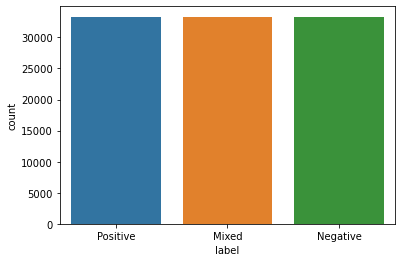

In [3]:
# Exploratory Data Analysis
import seaborn as sns
sns.countplot(x='label', data=df)

In [4]:
#Convert to Data Frame to do operations
Data=pd.DataFrame(df)
Data.head()

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...


In [5]:
# We need neutral reviews in the dataset for this binary classification problem. 
# So, i will drop those rows from the dataset.
Data = Data[Data['label'] != 'Mixed']
print(Data.shape)
Data.head(5)

(66666, 2)


,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...


In [6]:
# Encoding the categorical values 
label_mapping = {"Positive": 1, "Negative":-1 }
Data["label"] = Data["label"].map(label_mapping)

In [7]:
Data["label"]

0        1
1        1
2        1
3        1
4        1
        ..
99994   -1
99995   -1
99996   -1
99997   -1
99998   -1
Name: label, Length: 66666, dtype: int64

In [8]:
# first we define a list of arabic and english punctiations that we want to get dispose of in our text

punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ#''' + string.punctuation

# Arabic stop words with nltk
stop_words = stopwords.words()

arabic_diacritics = re.compile("""  ّ    | # Shadda  َ    | # Fatha  ً    | # Tanwin Fath  ُ    | # Damma ٌ    | # Tanwin Damm  ِ    | # Kasra  ٍ    | # Tanwin Kasr
                                    ْ    | # Sukun ـ     # Tatwil/Kashida """, re.VERBOSE)

def Preprocess(text):
   #remove punctuations
    Punc_Remov = str.maketrans('', '', punctuations)
    text = text.translate(Punc_Remov)
    
    # remove Tashkeel
    Text = re.sub(arabic_diacritics, '', text)
    
    #remove longation
    text = re.sub("[إأآا]", "ا", Text)
    text = re.sub("ى", "ي", Text)
    text = re.sub("ؤ", "ء", Text)
    text = re.sub("ئ", "ء", Text)
    text = re.sub("ة", "ه", Text)
    text = re.sub("گ", "ك", Text)
    
    text = '+'.join(word for word in text.split() if word not in stop_words)

    return Text
processed_tweets = Data['text'].apply(Preprocess)

In [9]:
 # Also Remove Emotions & Links & Mentions & Hashtag 
processed_tweets= processed_tweets.map(lambda text: re.sub(r'[^\u0600-\u06ff\u0750-\u077f\ufb50-\ufbc1\ufbd3-\ufd3f\ufd50-\ufd8f\ufd50-\ufd8f\ufe70-\ufefc\uFDF0-\uFDFD]+', ' ', text).strip())

In [10]:
#convert text to numbers and do features extraction
Vectorizer = TfidfVectorizer(max_features=2000, min_df=5,max_df=0.7)# analyzer='word'
#(ngram_range=(1,8),  analyzer='char' ,  max_df=0.999999999, min_df=1, sublinear_tf=True, use_idf=True, norm='l2' )


In [11]:
X =Vectorizer.fit_transform(processed_tweets).toarray()
Y = Data['label']

In [12]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
99994   -1
99995   -1
99996   -1
99997   -1
99998   -1
Name: label, Length: 66666, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1,random_state=4) 

In [14]:
#clf=SVC(kernel='rbf')
estimators = { SVC() : {'C':[0.1], 'kernel' : ['rbf'],
                        'degree' : [3,5]},LogisticRegression:{'penalty':[2], 'C': [1]}}

In [ ]:
for clf , hyper_params in estimators.items():
    BB  = GridSearchCV( clf, hyper_params, cv=3)
   # rand = RandomizedSearchCV(pipe , hyper_params, random_state = 3)
    BB.fit(X_train,y_train)
    predics = BB.predict(X_test)
    print("{} acuracy = {} % , and precision score = {} % \n Best parameters are {} \n"
          .format(str(clf).replace('()',''),round(accuracy_score(y_test, predics) *100,4),
                  round(precision_score(y_test, predics)*100,4),BB.best_params_))
    print (classification_report(y_test, predics,digits=3))
    confus_Model= confusion_matrix(y_test, predics)
    ax = sns.heatmap(confus_Model, annot=True, cmap='Blues')
    ax.set_title(' Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Negative','Positive'])
    ax.yaxis.set_ticklabels(['Negative','Positive'])
## Display the visualization of the Confusion Matrix.
    plt.show()
    